In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os.path
if not os.path.exists('mlp_helper.py'):
    !wget https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from mlp_helper import draw_neural_net, return_weights_notation

Interesante articulo sobre Universal Aproximation Theorem:

http://neuralnetworksanddeeplearning.com/chap4.html

# Pruebas a realizar
- hidden units 2, 3, 6
- Activation sigmoid y relu

# Dataset

In [4]:
np.random.seed(10)
# X = np.random.normal(0, 10, 100)
X = np.linspace(-20, 20, 200)

In [5]:
sigma = 1
y = np.abs(X) + np.random.normal(0, sigma, len(X))
y = np.cos(X/2) + np.random.normal(0, 0.01, len(X))

Text(0, 0.5, '$y$')

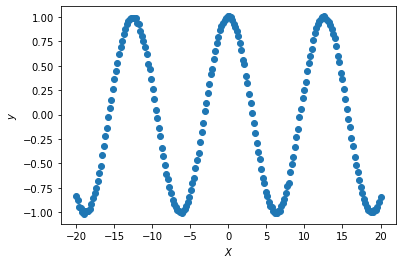

In [6]:
plt.scatter(X, y)
plt.xlabel('$X$')
plt.ylabel('$y$')

# Model

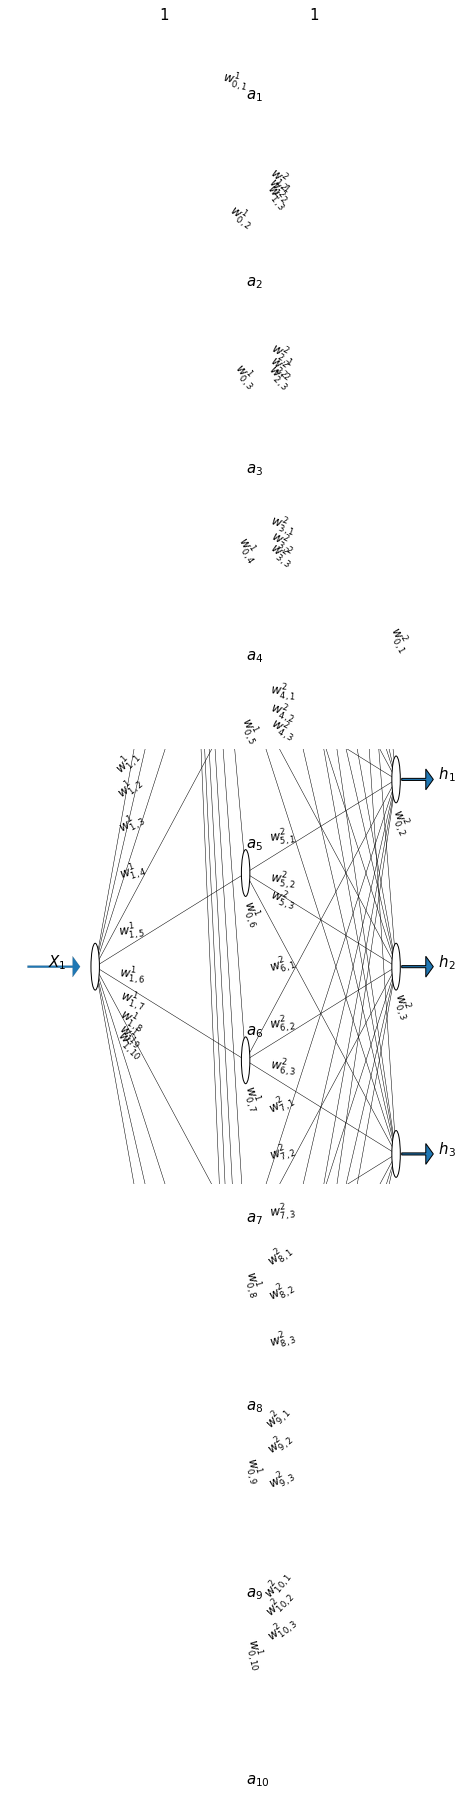

In [7]:
input_dim = 1
hidden_units = 10
outputs = 3
activation = 'sigmoid'

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,outputs]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(Adam(lr=0.1), loss='mse', metrics=['mse'])

# Entrenamiento del modelo

In [19]:
model.fit(X, y, verbose=0, epochs=500)

In [20]:
print(model.metrics_names)
print(model.evaluate(X, y))

['loss', 'mse']
200/200 [==============================] - 0s 35us/sample - loss: 0.1481 - mse: 0.1481
[0.14809745721518994, 0.14809746]


In [21]:
y_pred = model.predict(X)

Text(0, 0.5, '$h_1$')

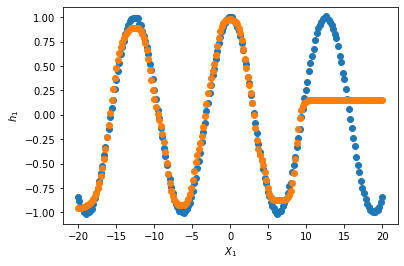

In [22]:
plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.xlabel('$X_1$')
plt.ylabel('$h_1$')

In [46]:
model.get_weights()

[array([[ 2.2946165, -2.2132342,  2.5580633,  1.1858311,  2.402698 ,
         -1.9191223, -1.8359884, -1.7541095, -2.3581972,  2.5884721]],
       dtype=float32),
 array([ -9.223808 , -18.702654 , -13.145587 , -17.692778 ,   8.570153 ,
          3.9878838,  18.824352 ,  14.038605 , -12.228734 ,   4.4288597],
       dtype=float32),
 array([[-0.80647075],
        [ 1.1230422 ],
        [-0.15427613],
        [-1.8584229 ],
        [ 0.9471457 ],
        [ 1.1406893 ],
        [-1.3428346 ],
        [-0.65466267],
        [-0.33393672],
        [ 0.6889671 ]], dtype=float32),
 array([0.33318657], dtype=float32)]

In [47]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

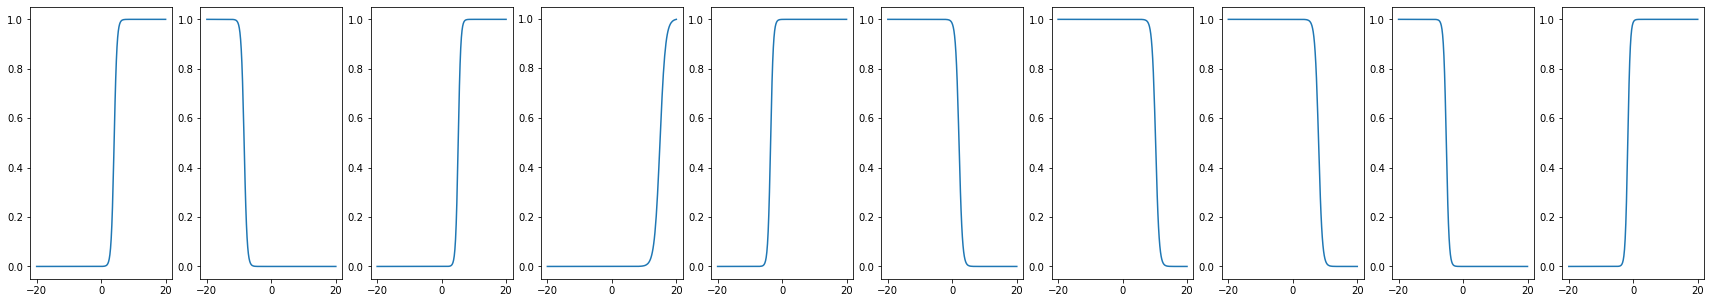

In [48]:
f, ax = plt.subplots(1, hidden_units, figsize=(30,5))
sub_models = []
preds = []
for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation, input_dim=1)
    sub_models.append(sub_model)
    preds.append(sub_model.predict(X))
    ax[i].plot(X, preds[i])

# Ejemplo con hidden_units=3 Activation sigmoid

![sigmoid_aprox_3hidden.png](sigmoid_aprox_3hidden.png)
![sigmoid_aprox_3hidden_all.png](sigmoid_aprox_3hidden_all.png)